<a href="https://colab.research.google.com/github/AHRAR-HASHMI/C-Sharp/blob/main/ZG536_FDS_Assignment1_2023HB21171_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
### FDS Assignment
   # Name :- HASHMI SYED AHRAR SYED ASRAR
   # BITS ID :- 2023HB21171
   # Email ID :- 2023hb21171@wilp.bits-pilani.ac.in
   # Number of member(s) in the group :- 1 ( Individual assignment)

In [2]:
# STEP 1 :- Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# STEP 2 :- Load the dataset

In [9]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Bolywood.csv')

# Display the first few rows of the dataset
df.head()


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [10]:
#Step 3: Data Cleaning and Preprocessing
#Check for missing values: Missing values can affect the analysis.
#Convert data types: Ensure columns like Release Date are in the correct format.
#Handle outliers: For numerical fields like Budget, BoxOfficeCollection, handle any extreme outliers if they exist.

In [14]:
# Checking for missing values
df.isnull().sum()



,0
SlNo,0
Release Date,0
MovieName,0
ReleaseTime,0
Genre,0
Budget,0
BoxOfficeCollection,0
YoutubeViews,0
YoutubeLikes,0
YoutubeDislikes,0


In [29]:
# Insights from Data 1 :- There are no missing values across all the columns

In [16]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y', errors='coerce')

df['Release Date'].head()



,Release Date
0,2014-04-18
1,2013-01-04
2,2014-07-18
3,2013-01-04
4,2014-07-04


In [17]:
# STEP 4 :- Descriptive Statistics

In [20]:
# Summary statistics for numerical columns
df.describe()

#df.describe() returns the following statistics for each numerical column:
#Count: The number of non-missing (non-NaN) values.
#Mean: The average value.
#Standard Deviation (std): Measures the amount of variation or dispersion from the mean.
#Minimum (min): The smallest value.
#25th Percentile (25%): The value below which 25% of the data falls.
#50th Percentile (50%) (Median): The middle value when the data is sorted.
#75th Percentile (75%): The value below which 75% of the data falls.
#Maximum (max): The largest value.

,SlNo,Release Date,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,2014-01-11 08:41:52.751677952,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
min,1.000000,2013-01-04 00:00:00,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,2013-06-28 00:00:00,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,2014-02-07 00:00:00,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,2014-07-04 00:00:00,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,2015-03-20 00:00:00,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000
std,43.156691,NaN,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938


In [22]:
# Value counts for categorical columns
df['Genre'].value_counts()

# This provides the count of films of the respective genres


,count
Genre,
Comedy,36
Drama,35
Thriller,26
Romance,25
Action,21
Thriller,3
Action,3


In [30]:
# Insights from Data 2 :- Most of the films released from 2013-2015 period were of Comedy genre, closely followed by Drama genre

In [26]:
# Step 5 :- Visualization Insights

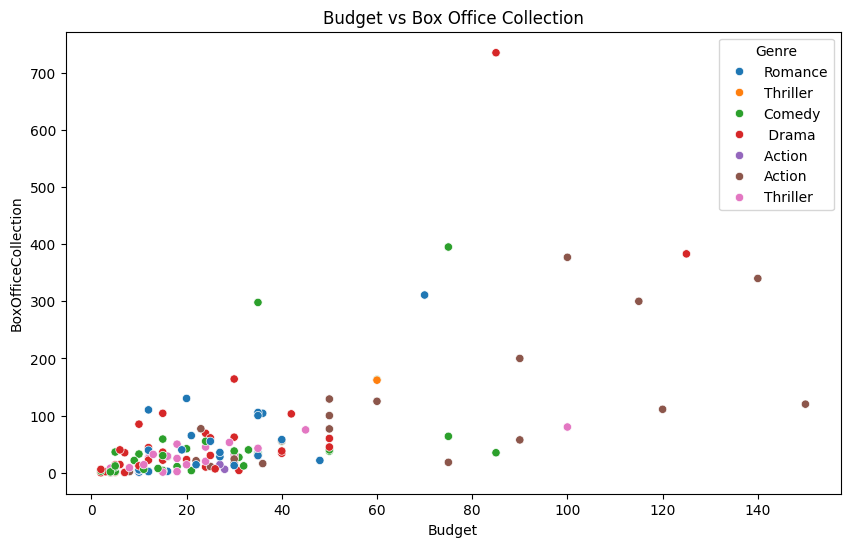

In [31]:
# Insight 1 :- Budget vs. Box Office Collection
# Scatter plot to visualize relationship between budget and box office collection
plt.figure(figsize=(10,6))
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=df)
plt.title('Budget vs Box Office Collection')
plt.show()


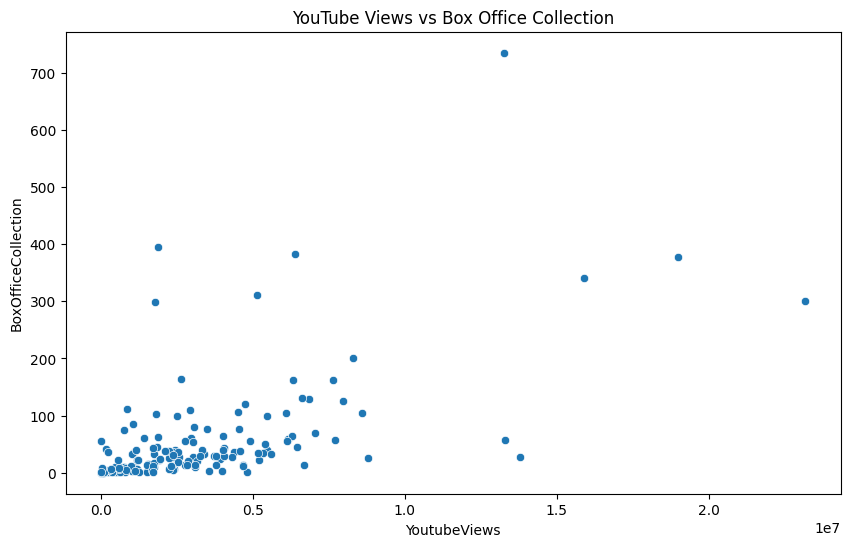

In [32]:
#Insight 2: Impact of YouTube Promotion on Box Office Collection
# Scatter plot for YouTube views and box office collection
plt.figure(figsize=(10,6))
sns.scatterplot(x='YoutubeViews', y='BoxOfficeCollection', data=df)
plt.title('YouTube Views vs Box Office Collection')
plt.show()


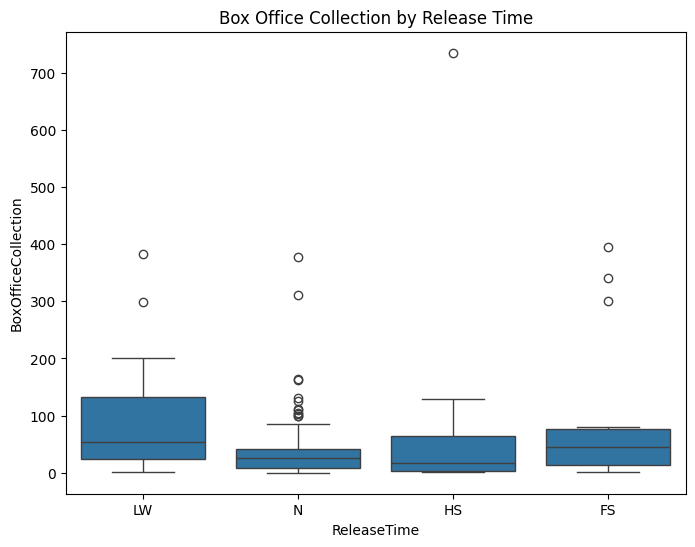

In [33]:
#Insight 3: Movies Released During Special Times vs Normal Time
# Bar plot comparing box office collection for different release times
plt.figure(figsize=(8,6))
sns.boxplot(x='ReleaseTime', y='BoxOfficeCollection', data=df)
plt.title('Box Office Collection by Release Time')
plt.show()


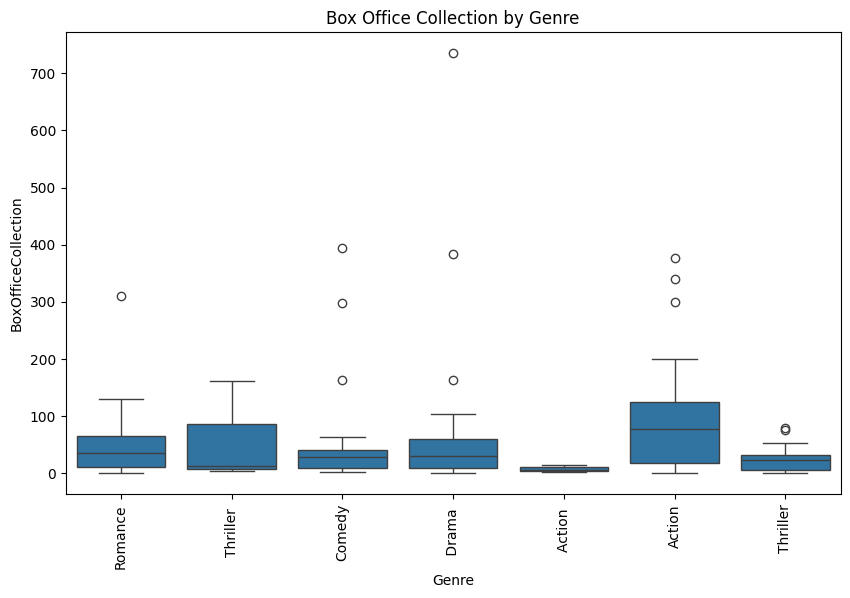

In [34]:
# Insight 4 :- Popular Genres Based on Box Office Collection
# Box plot for genre vs. box office collection
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='BoxOfficeCollection', data=df)
plt.title('Box Office Collection by Genre')
plt.xticks(rotation=90)
plt.show()


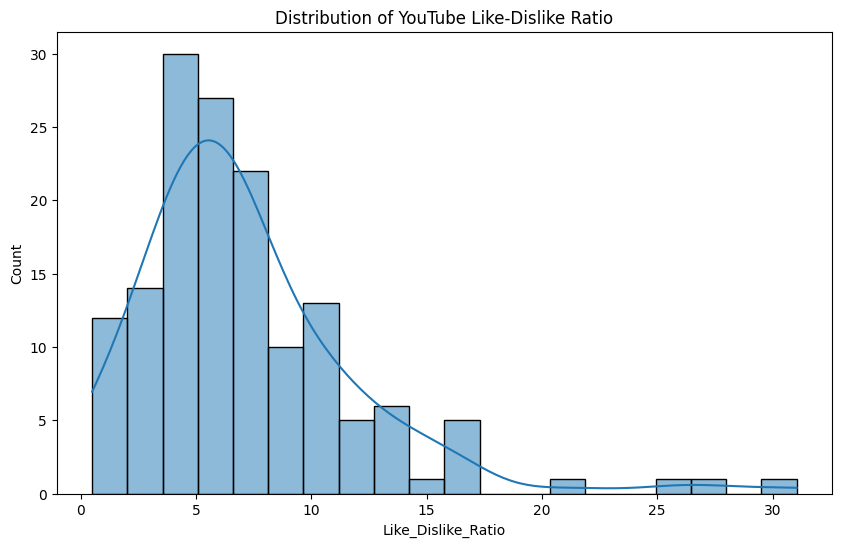

In [36]:
# Insight 5 :- YouTube Likes and Dislikes Ratio
# Create a new column for like-dislike ratio and plot
df['Like_Dislike_Ratio'] = df['YoutubeLikes'] / (df['YoutubeDislikes'] + 1)  # To avoid division by zero
plt.figure(figsize=(10,6))
sns.histplot(df['Like_Dislike_Ratio'], bins=20, kde=True)
plt.title('Distribution of YouTube Like-Dislike Ratio')
plt.show()


Top 10 Highest Grossing Movies:


<ipython-input-38-a5db831b883c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BoxOfficeCollection', y='MovieName', data=top_10_movies, palette='magma')


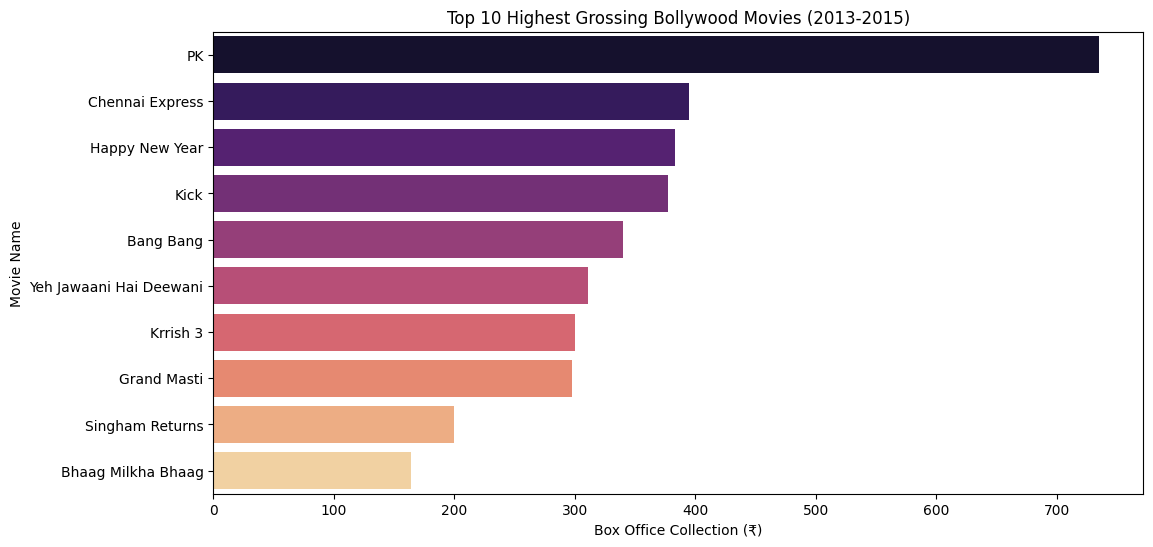

In [38]:
# Insight 6 :- Top 10 Highest Grossing Movies
# Sort the DataFrame by BoxOfficeCollection in descending order
top_10_movies = df.sort_values(by='BoxOfficeCollection', ascending=False).head(10)

# Display the top 10 movies
print("Top 10 Highest Grossing Movies:")

# Bar plot for top 10 movies
plt.figure(figsize=(12,6))
sns.barplot(x='BoxOfficeCollection', y='MovieName', data=top_10_movies, palette='magma')
plt.title('Top 10 Highest Grossing Bollywood Movies (2013-2015)')
plt.xlabel('Box Office Collection (₹)')
plt.ylabel('Movie Name')
plt.show()


Top 10 Movies with Highest Budget to Box Office Ratio:
                     MovieName  Budget  BoxOfficeCollection  \
64                  Aashiqui 2      12                110.0   
89                          PK      85                735.0   
132                Grand Masti      35                298.0   
135               The Lunchbox      10                 85.0   
87                      Fukrey       5                 36.2   
58                    Mary Kom      15                104.0   
128                     Shahid       6                 40.0   
37   Humpty Sharma Ki Dulhania      20                130.0   
101         Bhaag Milkha Bhaag      30                164.0   
115            Chennai Express      75                395.0   

     Budget_BoxOffice_Ratio  
64                 9.166667  
89                 8.647059  
132                8.514286  
135                8.500000  
87                 7.240000  
58                 6.933333  
128                6.666667  
37         

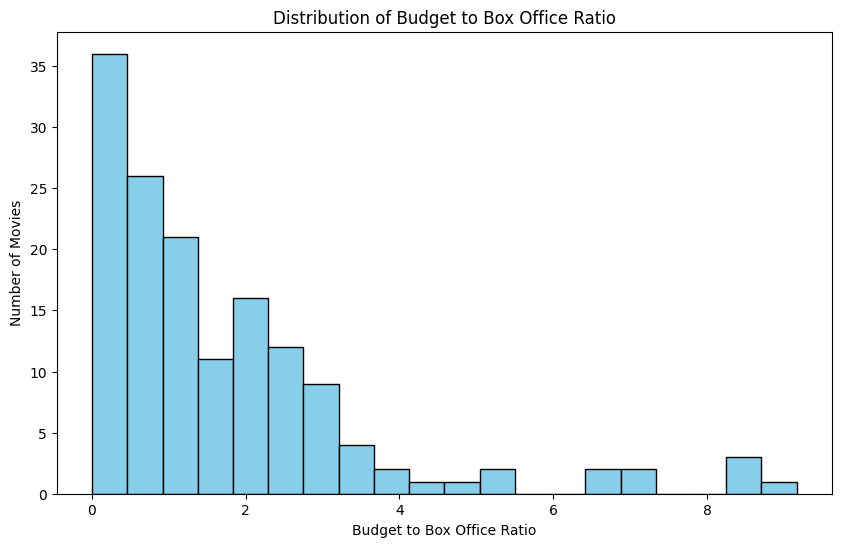

In [44]:
# Insight 7 :- Return of investment - Budget to Box office ratio
# Calculate ROI ratio
# Creating a new column 'Budget_BoxOffice_Ratio'
df['Budget_BoxOffice_Ratio'] = df['BoxOfficeCollection'] / df['Budget']

# Sorting the data by the 'Budget_BoxOffice_Ratio' to analyze top and bottom movies
budget_boxoffice_sorted = df[['MovieName', 'Budget', 'BoxOfficeCollection', 'Budget_BoxOffice_Ratio']].sort_values(by='Budget_BoxOffice_Ratio', ascending=False)

# Display the top 10 and bottom 10 movies based on Budget to Box Office Ratio
top_10_ratio = budget_boxoffice_sorted.head(10)
bottom_10_ratio = budget_boxoffice_sorted.tail(10)

# Display the results
print("Top 10 Movies with Highest Budget to Box Office Ratio:")
print(top_10_ratio)

print("\nBottom 10 Movies with Lowest Budget to Box Office Ratio:")
print(bottom_10_ratio)




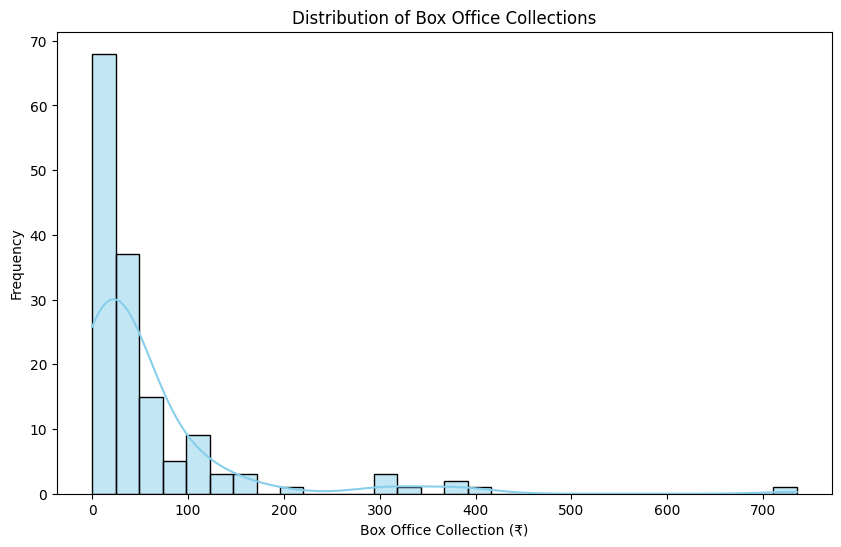

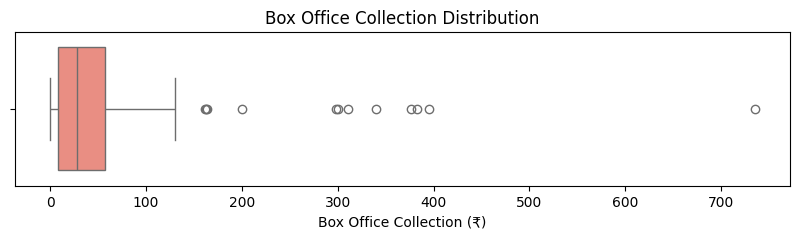

In [47]:
# Insight 8: Distribution of Box Office Collection
# Plot histogram and KDE for BoxOfficeCollection
plt.figure(figsize=(10,6))
sns.histplot(df['BoxOfficeCollection'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Box Office Collections')
plt.xlabel('Box Office Collection (₹)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=df['BoxOfficeCollection'], color='salmon')
plt.title('Box Office Collection Distribution')
plt.xlabel('Box Office Collection (₹)')
plt.show()


<ipython-input-48-ff6a2c243f72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_performance, x='ReleaseTime', y='BoxOfficeCollection', palette='viridis')


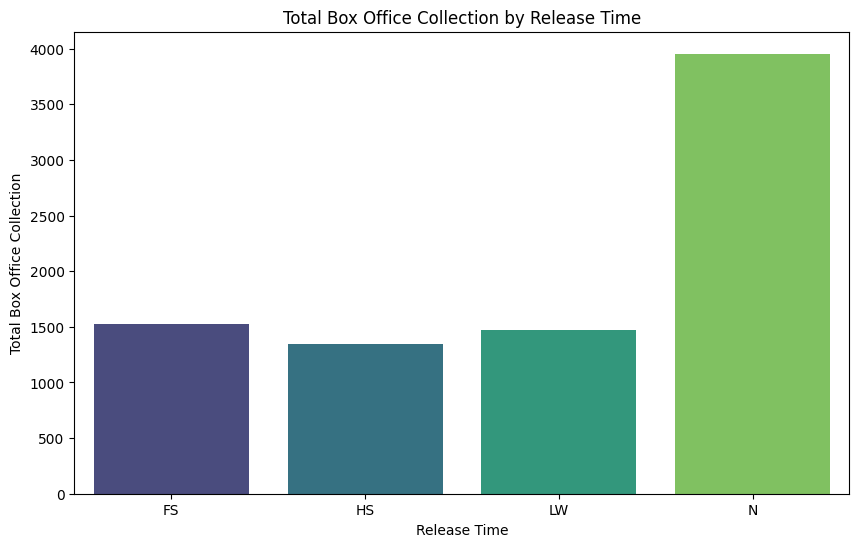

In [48]:
# Insight 9 :- Seasonal impact of the box office
# Grouping by ReleaseTime and calculating total box office collection
seasonal_performance = df.groupby('ReleaseTime')['BoxOfficeCollection'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_performance, x='ReleaseTime', y='BoxOfficeCollection', palette='viridis')
plt.title('Total Box Office Collection by Release Time')
plt.xlabel('Release Time')
plt.ylabel('Total Box Office Collection')
plt.show()


In [54]:
# Insight 10 :- Box Office Performance by Budget Tiers
# Creating budget tiers
def budget_tier(budget):
    if budget < 50:  # Less than 50 crore
        return 'Low Budget'
    elif 50 <= budget < 100:  # 50 to 100 crore
        return 'Medium Budget'
    else:  # 100 crore, and more
        return 'High Budget'

df['BudgetTier'] = df['Budget'].apply(budget_tier)

# Analyzing average box office collection by budget tiers
budget_tier_performance = df.groupby('BudgetTier')['BoxOfficeCollection'].mean().reset_index()

budget_tier_performance


,BudgetTier,BoxOfficeCollection
0,High Budget,244.428571
1,Low Budget,30.883629
2,Medium Budget,152.991667


In [40]:
# Summary

In [55]:
### Insights #1:
# Higher budgets generally lead to higher box office earnings, especially in genres like Action and Thriller. However, strategic budgeting and other factors also play significant roles.

### Insights #2:
# Effective YouTube promotion, as indicated by higher trailer views, positively influences box office success, emphasizing the importance of online marketing.

### Insights #3:
# Strategic release timing during peak seasons like long weekends and festive periods significantly boosts box office collections

### Insights #4:
# Action and Comedy genres dominate in terms of box office performance, guiding future genre-focused investments.

### Insights #5:
#  A high like-dislike ratio on trailers reflects positive audience reception, contributing to enhanced visibility and box office performance

### Insights #6
# The top 10 highest-grossing movies are predominantly high-budget Action and Thriller films, often released during festive periods, highlighting the importance of genre, budget, and timing in box office success.

### Insights #7:
# Movies with a high Budget to Box Office Ratio demonstrate exceptional financial success, achieving significant returns on moderate budgets, while low ratios indicate underperformance despite higher investments

### Insights #8:
# The distribution of box office collections reveals a right-skewed trend, indicating that a few movies achieve exceptionally high revenues while the majority earn modest amounts, highlighting the disparities in movie success.

### Insights #9:
# Movies released during holidays or long weekends tend to have significantly higher box office collections, indicating that strategic timing during festive seasons maximizes audience attendance.


### Insights #10:
# The analysis of box office performance across different budget tiers reveals that while high-budget films tend to generate greater average collections, medium-budget films can achieve remarkable success, suggesting that creativity and content quality can sometimes outshine financial investment in the film industry.

